In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp
import astropy.constants as const
import astropy.units as u
import scienceplots
plt.style.use('science')

In [2]:
mass_lifetime = pd.read_table('single_mass_lifetimes.data', skiprows = 3, sep = '\s+')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_17836/2108266750.py:1: SyntaxWarning: invalid escape sequence '\s'
  mass_lifetime = pd.read_table('single_mass_lifetimes.data', skiprows = 3, sep = '\s+')


In [21]:
min(mass_lifetime['age_SN_WD'])

3.32055

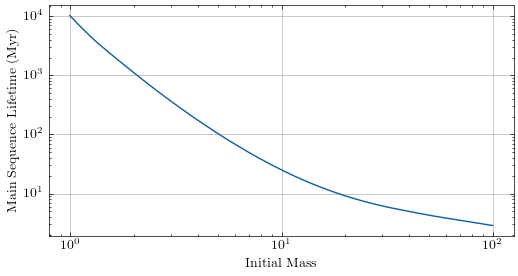

In [3]:
fig, ax = plt.subplots(1,1, figsize= (6,3))
plt.plot(mass_lifetime['mass'], mass_lifetime['age_TAMS'])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Main Sequence Lifetime (Myr)')
plt.xlabel('Initial Mass')
plt.grid()
plt.show()

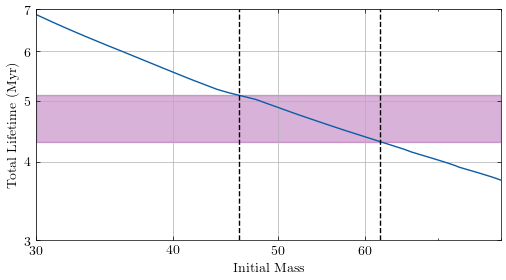

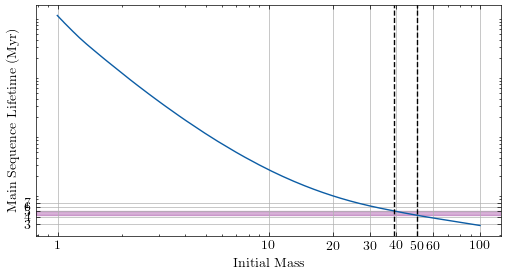

In [57]:
fig, ax = plt.subplots(1,1, figsize= (6,3))
plt.plot(mass_lifetime['mass'], mass_lifetime['age_SN_WD'])
plt.xscale('log')
plt.yscale('log')
_ = plt.xticks([1,10,20,30,40,50,60,100], [1,10,20,30,40,50,60,100])
_ = plt.yticks([3,4,5,6,7], [3,4,5,6,7])
plt.axhspan(4.7-0.4,4.7+0.4, color = 'purple', alpha = 0.3)
plt.axvline(46, color = 'k', linestyle = '--')
plt.axvline(62, color = 'k', linestyle = '--')
plt.xlim(30,80)
plt.ylim(3,7)
plt.ylabel('Total Lifetime (Myr)')
plt.xlabel('Initial Mass')
plt.grid()
plt.show()

fig, ax = plt.subplots(1,1, figsize= (6,3))
plt.plot(mass_lifetime['mass'], mass_lifetime['age_TAMS'])
plt.xscale('log')
plt.yscale('log')
_ = plt.xticks([1,10,20,30,40,50,60,100], [1,10,20,30,40,50,60,100])
_ = plt.yticks([3,4,5,6,7], [3,4,5,6,7])
plt.axhspan(4.7-0.4,4.7+0.4, color = 'purple', alpha = 0.3)
plt.axvline(39, color = 'k', linestyle = '--')
plt.axvline(50, color = 'k', linestyle = '--')
plt.xlim(30,80)
plt.ylim(3,7)
plt.ylabel('Main Sequence Lifetime (Myr)')
plt.xlabel('Initial Mass')
plt.grid()
plt.show()


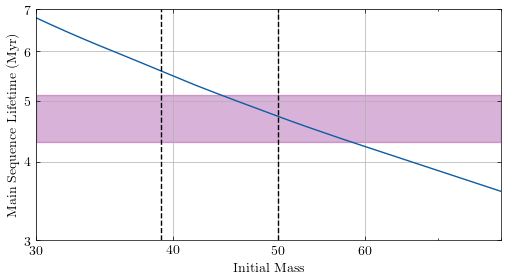

In [38]:
fig, ax = plt.subplots(1,1, figsize= (6,3))
plt.plot(mass_lifetime['mass'], mass_lifetime['age_TAMS'] * 1.1)
plt.xscale('log')
plt.yscale('log')
_ = plt.xticks([1,10,20,30,40,50,60,100], [1,10,20,30,40,50,60,100])
_ = plt.yticks([3,4,5,6,7], [3,4,5,6,7])
plt.axhspan(4.7-0.4,4.7+0.4, color = 'purple', alpha = 0.3)
plt.axvline(39, color = 'k', linestyle = '--')
plt.axvline(50, color = 'k', linestyle = '--')
plt.xlim(30,80)
plt.ylim(3,7)
plt.ylabel('Main Sequence Lifetime (Myr)')
plt.xlabel('Initial Mass')
plt.grid()
plt.show()

In [4]:
rejuvenation = np.linspace(0,100,500)
mass = mass_lifetime['mass'].values
rejuvenation_lifetime = np.array([(1 + r/100) * mass_lifetime['age_TAMS'].values for r in rejuvenation])

In [5]:
observed_age = 4.7
error = 0.4

In [6]:
m2lim = np.zeros(len(rejuvenation))
m2lim_lower = np.zeros(len(rejuvenation))
m2lim_upper = np.zeros(len(rejuvenation))
for i,r in enumerate(rejuvenation):
    try:
        func = sp.interpolate.interp1d(rejuvenation_lifetime[i,:], mass)
        m2lim[i] = func(observed_age)
        m2lim_upper[i] = func(observed_age - 0.4)
        m2lim_lower[i] = func(observed_age + 0.4)
        
    except: 
        print(r, min(rejuvenation_lifetime[i,:]))

49.498997995991985 4.300009779559118
49.699398797595194 4.305773867735471
49.899799599198396 4.311537955911823
50.100200400801604 4.317302044088176
50.30060120240481 4.323066132264529
50.501002004008015 4.3288302204408815
50.701402805611224 4.334594308617235
50.90180360721443 4.3403583967935875
51.102204408817634 4.34612248496994
51.30260521042084 4.351886573146293
51.50300601202405 4.357650661322646
51.703406813627254 4.363414749498998
51.90380761523046 4.36917883767535
52.10420841683367 4.374942925851704
52.30460921843687 4.380707014028056
52.50501002004008 4.386471102204409
52.70541082164329 4.392235190380761
52.90581162324649 4.397999278557115
53.1062124248497 4.403763366733466
53.30661322645291 4.40952745490982
53.50701402805611 4.415291543086172
53.70741482965932 4.421055631262525
53.90781563126253 4.426819719438878
54.10821643286573 4.43258380761523
54.30861723446894 4.438347895791583
54.50901803607215 4.444111983967936
54.70941883767535 4.4498760721442885
54.90981963927856 4.45

In [20]:
func = sp.interpolate.interp1d(mass_lifetime['age_SN_WD'].values, mass)
m1_lower_limit = func(2.5)

ValueError: A value (2.5) in x_new is below the interpolation range's minimum value (3.32055).

<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_17836/2279643613.py:7: SyntaxWarning: invalid escape sequence '\%'
  plt.xlabel('Rejuvenation (\%)')


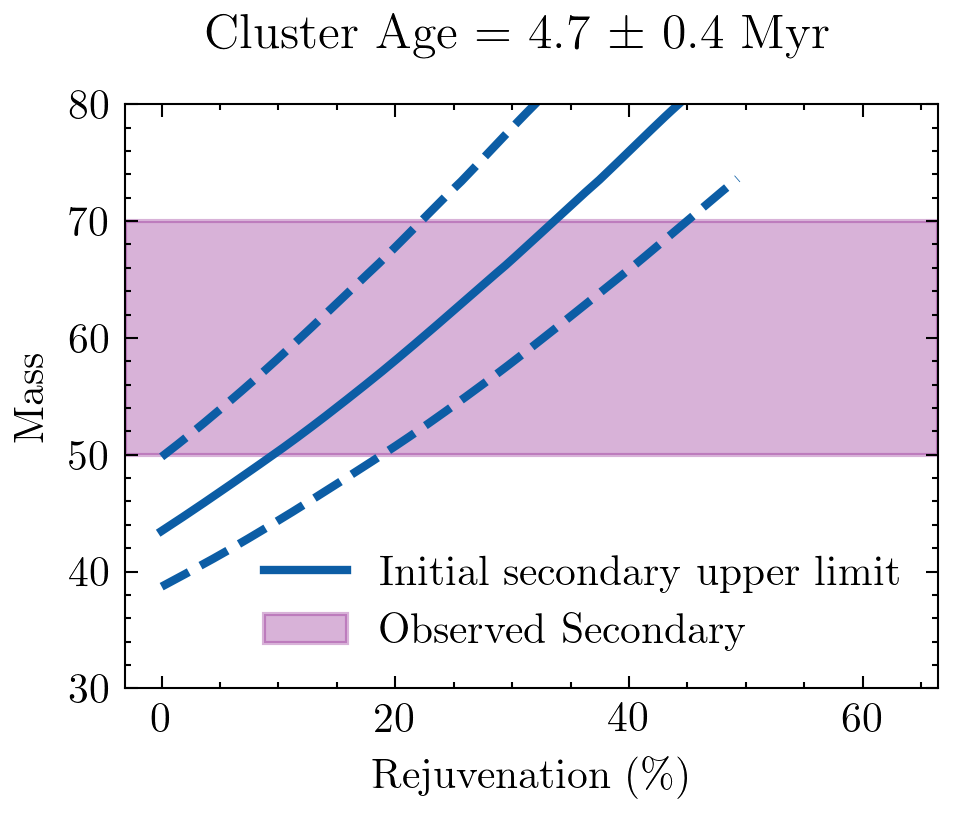

In [16]:
lw = 2
plt.plot(rejuvenation[m2lim > 0], m2lim[m2lim > 0], lw = lw, color = 'C0', label = 'Initial secondary upper limit')
plt.plot(rejuvenation[m2lim_lower > 0], m2lim_lower[m2lim_lower > 0], lw = lw, color = 'C0', linestyle = 'dashed')
plt.plot(rejuvenation[m2lim_upper > 0], m2lim_upper[m2lim_upper > 0], lw = lw, color = 'C0', linestyle = 'dashed')
plt.axhspan(60-10,60+10, color = 'purple', alpha = 0.3, label = 'Observed Secondary')
plt.ylim(30,80)
plt.xlabel('Rejuvenation (\%)')
plt.ylabel('Mass')
plt.legend()
plt.suptitle(r'Cluster Age = 4.7 $\pm$ 0.4 Myr')
plt.gca().set_aspect('equal')
plt.rcParams['figure.dpi']=100

<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_17836/1645934097.py:7: SyntaxWarning: invalid escape sequence '\%'
  plt.xlabel('Rejuvenation (\%)')


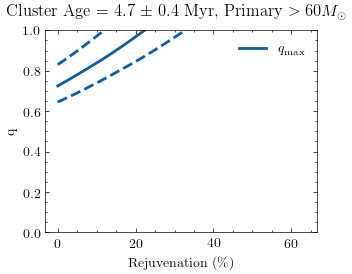

In [19]:
lw = 2
plt.plot(rejuvenation[m2lim > 0], m2lim[m2lim > 0] / 60, lw = lw, color = 'C0', label = r'$q_{\rm max}$')
plt.plot(rejuvenation[m2lim_lower > 0], m2lim_lower[m2lim_lower > 0] / 60, lw = lw, color = 'C0', linestyle = 'dashed')
plt.plot(rejuvenation[m2lim_upper > 0], m2lim_upper[m2lim_upper > 0] / 60, lw = lw, color = 'C0', linestyle = 'dashed')
#plt.axhspan(60-10,60+10, color = 'purple', alpha = 0.3, label = 'Observed Secondary')
plt.ylim(0,1)
plt.xlabel('Rejuvenation (\%)')
plt.ylabel('q')
plt.legend()
plt.suptitle(r'Cluster Age = 4.7 $\pm$ 0.4 Myr, Primary $> 60M_{\odot}$')
# plt.gca().set_aspect('equal')
plt.rcParams['figure.dpi']=100